In [1]:
import os

In [231]:
TOP = os.getcwd().replace('notebooks','')
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
interim_dir = TOP + 'data/interim/'

In [3]:
external_dir

'/home/grace/Documents/python/tsca_categories/data/external/'

In [4]:
def split_file(input_file, output_prefix, n_rows):
    with open(input_file, 'r') as file:
        lines = file.readlines()
    
    # Calculate the number of chunks
    num_chunks = (len(lines) + n_rows - 1) // n_rows
    
    for i in range(num_chunks):
        chunk_lines = lines[i*n_rows : (i+1)*n_rows]
        output_file = f"{output_prefix}_part{i+1}.txt"
        with open(output_file, 'w') as chunk_file:
            chunk_file.writelines(chunk_lines)
        


In [7]:
input_file = processed_dir+'TSCA_2022_.txt'
output_prefix = external_dir+'chunked_data'
n_rows = 1000  # number of rows per chunk

In [8]:
split_file(input_file, output_prefix, n_rows)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
%matplotlib inline

In [105]:
def smiles_inchi(s):
    try:
        a = Chem.MolFromSmiles(s)
        b = Chem.MolToInchi(a) 
        return Chem.InchiToInchiKey(b)
    except Exception as error:
        print(f"Error processing SMILES string {s}: {error}")
        return None

In [79]:
tsca = pd.read_csv(processed_dir+'TSCA_2022.txt', sep = '\t', header = None,names =['smiles', 'dtxsid'])

In [90]:
tsca_dict = {k:v for k,v in zip( tsca['smiles'], tsca['dtxsid'])}

In [106]:
tsca_inchi = {smiles_inchi(k): v for k,v in tsca_dict.items()}

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41]

Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]1)([O-]\C(=[O]/2)C(CC)CCCC)[N]1(C)CC[N]6(C)CC[N]7(C)CC1)C(CC)CCCC.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC1=[O][Co++]2([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(C)=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string ClCCO[P+3](OCCCl)(OCCCl)[Cu+][Cl-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Metal was disconnected

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Omitted undefined

Error processing SMILES string Cl[Ru+](Cl)([C-]#[O+])([C-]#[O+])(P(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1)P(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]C1=C(\C=[N]2\CC\[N]([Co++]2)=C\C2=CC=CC(F)=C2[O-])C=CC=C1F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=[C--]1[Co++]2([C-]#[O+])([C-]#[O+])([C-]#[O+])[C--](=O)[Co++]12([C-]#[O+])([C-]#[O+])[C-]#[O+]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:41] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] Explicit valence for atom # 4 N, 4, is greater than permitted
[12:17:41] WARNING: Metal was disconnected

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41

Error processing SMILES string [H][C-]1C(C)=[O][Ti+4]2([O-]CC)([O-]C(C)C)([O]=C1C)[O]=C(C)[C-]([H])C(C)=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string C[O](C)[B](F)(F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string F[Br](F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O]#C[W](C#[O])(C#[O])(C#[O])(C#[O])C#[O]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCCCCC[N](C)(C)[B+3]([Cl-])([Cl-])[Cl-]: Python arg

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefi

Error processing SMILES string CO[B+3]([F-])([F-])[F-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][O]1C2=C(C=C(C=C2C(=O)[O-][Zn++]11[O-]C(=O)C2=CC(=CC(=C2[O]1[H])C(C)(C)C)C(C)(C)C)C(C)(C)C)C(C)(C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNIN

Error processing SMILES string O=C1[O-][Y+3]2([O-]C1=O)[O-]C1=[O][Y+3]3([O-]C(=O)C(=O)[O-]3)[O-]C1=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][O-][Ti+4]123[O-]CC[N]1(CC[O-]2)CC[O-]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][O-][Cr+3]1([O-][H])[O-]C(CCCCCCCCCCCCC)=[O][Cr+3]([O-][H])([O-][H])[O-]1[H]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]\C(C)=[O]/2)([O-]1)[N]1(C)CC[N]6(C)CC[N]7(C)CC1)C(CC)CCCC.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneT

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Accepted unusual valence(s): Ce(2); Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] Explicit valence for atom # 8 O, 3, is greater than permitted
[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Ch

Error processing SMILES string F[Cl](F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string -: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [BH2]1[H][BH2][H]1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O]#C[Mo](C#[O])(C#[O])(C#[O])(C#[O])C#[O]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:42] WARNING: Accepted unusual valence(s): Si(3); Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal w

Error processing SMILES string [H]OC1=C(\N=N\C2=CC=C(C=C2)N([H])C(=O)C2=CC=C(C=C2)\N=N\C2=C(O[H])N([H])C(=O)C(=C2C)[N]2=CC=CC(C)=C2)C(C)=C(C(=O)N1[H])[N]1=CC(C)=CC=C1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(C)=[O][Mn]67([O-]\C(C)=[O]/2)([O-]1)[N]1(C)CC[N]6(C)CC[N]7(C)CC1.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC[O](CC)[B+3]([F-])([F-])[F-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O]#C[Ru]1(C#[O])(C#[O])(C#[O])[Ru](C#[O])(C#[O])(C#[O])(C#[O])[Ru]1(C#[O])(C#[O])(C#[O])C#[O]: Python

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Metal was disconnected; Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Accepted unusual valence(s): Mo+3(2); Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Metal was disconnected

[12:17:43] WARNING: Charges were rearranged; Omitted undefined s

Error processing SMILES string CCOC1=[O][Ti+4]23([O-]CCC[O-]2)([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(OCC)=[O]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]1N2C=CC=CC2=[S][Zn++]11[O-]N2C=CC=CC2=[S]1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCC12C[O-][Zr+4]([O-]C3=CC(N)=CC=C3)([O-]C3=CC(N)=CC=C3)([O-]C3=CC(N)=CC=C3)([O](CC=C)C1)[O](CC=C)C2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string B#[Si](#B)(#B)(#B)(#B)#B: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44

Error processing SMILES string [H][C-]1C(C)=[O][Al+3]2([O-]CC(C)C[O-]2)[O]=C1OC(C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCC[C-]12[C]3(=[C]4([C]5(=[C]1([Zr+4]23451234([C]5(=[C]1([C-]2([C]3(=[C]45[H])[H])CCCC)[H])[H])([Cl-])[Cl-])[H])[H])[H])[H]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Charges were rearranged

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Charges were rearranged

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARN

Error processing SMILES string O=C1[O-][Gd+3]2([O-]C1=O)[O-]C1=[O][Gd+3]3([O-]C(=O)C(=O)[O-]3)[O-]C1=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string C[N-](C)[Zr+4]1234([C]5(=[C]1([H])[C-]2([H])[C]3(=[C]45[H])[H])[H])([N-](C)C)[N-](C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]C1=C(Cl)C2=[O][Hg++][O-]C2=C(Cl)C1=O: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][C-]1C(C)=[O][Ti+4]23([O-]CCC[O-]2)([O]=C1C)[O]=C(C)[C-]([H])C(C)=[O]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInch

[12:17:45] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] Explicit valence for atom # 0 O, 3, is greater than permitted
[12:17:45] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[1

Error processing SMILES string [O-]1[Ti+4]234([O-]CC[N]2(C)C)([O-]CC[N]3(C)C)([O-]CC[N]4(C)C)[N](C)(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCC[Sn]123(CCCC)OC(C)=CC(C)=[O]1.CC(O2)=CC(C)=[O]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC1=[O][Co+3]234([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(C)=[O]2.CC([CH-]C(C)=[O]3)=[O]4: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Proton(s) added/removed

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Proton(s) added/removed

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted und

Error processing SMILES string CC1=[O][V++]2(=O)([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(C)=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][B]1234[H][B]115([H])[B]678([H])[H][B]669([H])[H][B]66%10([H])[B]22([H])([H]3)[B]411([H])[B]573([H])[B]896([H])[B]%10213[H]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string F[Cl](=O)(=O)=O: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][O-]1[Cr+3]([Cl-])([Cl-])[O-]C(CCCCCCCCCCCCC)=[O][Cr+3]1([Cl-])[Cl-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDK

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Metal was disconnected

[12:17:45] WARNING: Charges were rearranged; Metal was disconnected

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:45] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:45] WAR

Error processing SMILES string CC1C=C[C-](=C1)[Mn+]([C-]#[O+])([C-]#[O+])[C-]#[O+]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC1=[O][Mn]2345[O-]C(C)=[O][Mn+3]67([O-]1)([O]=C(C)[O-]2)[N]1(C)CC[N]6(C)CC[N]7(C)CC1.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WA

Error processing SMILES string CC(=C)C(=O)OCC(O)C[N]1(CC(=O)[O-][Mg++]11[O-]C(=O)C[N]1(CC(O)COC(=O)C(C)=C)C1=CC=C(C)C=C1)C1=CC=C(C)C=C1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:46] WARNING: Accepted unusual valence(s): Si(1)

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Metal was disconnected

[12:17:46] WARNING: Metal was disconnected

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Accepted unusual valence(s): Er(12); Metal was disconnected

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] Expli

In [108]:
len(tsca_inchi)

14182

In [32]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors


In [109]:
import glob

In [115]:
files = glob.glob(external_dir+'/report_summary*.txt',  
                   recursive = True) 

In [122]:
def prep_df(f):
    df = pd.read_csv(f, sep = '\t',skiprows=36)
    df['INCHI'] = df['SMILES'].apply(lambda x: smiles_inchi(x))
    df['dtxsid'] = df['INCHI'].apply(lambda x: tsca_inchi[x] if x in tsca_inchi.keys() else np.nan )
    return df

In [126]:
mydfs = []
for f in files:
    mydfs.append(prep_df(f))
    

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Metal was disconnected

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefine

Error processing SMILES string -: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H]1B[H]B1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O#C[Mo](C#O)(C#O)(C#O)(C#O)C#O: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:46] WARNING: Metal was disconnected

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Metal was disconnected

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Charges were rearranged

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WAR

Error processing SMILES string O=C(Nc3ccc(N=NC1=C(O)NC(=O)C(=C1C)n2cccc(c2)C)cc3)c6ccc(N=NC4=C(O)NC(=O)C(=C4C)n5cccc(c5)C)cc6: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(C)=[O][Mn]67([O-]\C(C)=[O]/2)([O-]1)[N]1(C)CC[N]6(C)CC[N]7(C)CC1.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=[C-2]1[Co+2]2([C-]#[O+])([C-]#[O+])([C-]#[O+])([C-2](=O)[Co+2]12([C-]#[O+])([C-]#[O+])([C-]#[O+])): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O1=C([CH-]C(=O[Ti+4]12(O=C([CH-]C(=O2)C)C)([O-]CC)[O-]C(C)C)C)C: Python a

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Metal was disconnected

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Charges were rearranged

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Salt was disconnected; Proton(s) added/removed

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Salt was disconnected; Proton(s) added/removed

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Charges were rearranged

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined st

Error processing SMILES string FB(F)(F)O(C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string FBr(F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O#C[W](C#O)(C#O)(C#O)(C#O)C#O: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCCCCCN(C)(C)[B+3]([Cl-])([Cl-])[Cl-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string B#[Si](#B)(#B)#B: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Charges were rearranged

[12:35:47] WARNING: Charges were rearranged

[12:35:47] WARNING: Metal was disconnected

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Salt was disconnected; Proton(s) added/removed

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] Explicit valence for atom # 8 N, 4, is greater than permitted
[12:35:47] WARNING: Charges were rearranged

[12:35:47] 

Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]1)([O-]\C(=[O]/2)C(CC)CCCC)[N]1(C)CC[N]6(C)CC[N]7(C)CC1)C(CC)CCCC.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O1=C([CH-]C(=O[Co+2]12(O=C([CH-]C(=O2)C)C))C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Accepted unusual valence(s): Ca(18); Metal was disconnected

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omi

Error processing SMILES string [F-][B+3]([F-])([F-])OC: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=C4[O-][Zn+2]1([O-]C(=O)c2cc(cc(c2(O1))C(C)(C)C)C(C)(C)C)(Oc3c4(cc(cc3C(C)(C)C)C(C)(C)C)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Metal was disconnected

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefine

Error processing SMILES string O=C4[O-][Gd+3]1(O=C2[O-][Gd+3]3(O=C2([O-]1))([O-]C(=O)C(=O)[O-]3))([O-]C4(=O)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [N-](C)(C)[Zr+4]2345([N-](C)C)([N-](C)C)(C=1C5(=C4([CH-]3(C=12)))): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=C2C([O-])=C(C1=O[Hg+2][O-]C1=C2Cl)Cl: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O1=C([CH-]C(=O[Ti+4]123(O=C([CH-]C(=O2)C)C)([O-]CCC[O-]3))C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::stri

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Metal was disconnected

[12:35:48] W

Error processing SMILES string O=C4[O-][Y+3]1(O=C2[O-][Y+3]3(O=C2([O-]1))([O-]C(=O)C(=O)[O-]3))([O-]C4(=O)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [OH-][Ti+4]123([O-]CCN3(CC[O-]1)(CC[O-]2)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [OH-][Cr+3]1([OH-])(O=C([O-][Cr+3]([OH-])([OH-])[OH-]1)CCCCCCCCCCCCC): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]\C(C)=[O]/2)([O-]1)[N]1(C)CC[N]6(C)CC[N]7(C)CC1)C(CC)CCCC.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, s

[12:35:49] WARNING: Charges were rearranged

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Charges were rearranged

[12:35:49] WARNING: Accepted unusual valence(s): Bi(4); Metal was disconnected; Proton(s) added/removed

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Metal was disconnected

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Metal was disconnected

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Proton(s) added/removed

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted 

Error processing SMILES string FCl(F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCC[Sn]123(CCCC)OC(C)=CC(C)=[O]1.CC(O2)=CC(C)=[O]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC1=[O][Co+3]234([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(C)=[O]2.CC([CH-]C(C)=[O]3)=[O]4: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Charges were rearranged

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49]

Error processing SMILES string [F-][B+3]([F-])([F-])O(CC)CC: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O#C[Ru]1(C#O)(C#O)(C#O)([Ru](C#O)(C#O)(C#O)(C#O)[Ru]1(C#O)(C#O)(C#O)(C#O)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:50] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Salt was disconnected; Proton(s) added/removed

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Accepted unusual valence(s): Ni(4); Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:35:50] WARNING: Metal was disconnected

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING

Error processing SMILES string -: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=[V+2]12(O=C([CH-]C(=O1)C)C)(O=C([CH-]C(=O2)C)C): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Accepted unusual valence(s): Ti(2); Metal was disconnected

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: O

Error processing SMILES string [H]3B145([H]B16%12(B%11%13%16([H]B29%16([H]B28%10(B347(B56%14(B78%15(B9%10%11B%12%13%14%15)))))))): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=Cl(=O)(=O)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O1=C([O-][Cr+3]([OH-][Cr+3]1([Cl-])[Cl-])([Cl-])[Cl-])CCCCCCCCCCCCC: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H]1B258([H]B378([H]B467([H]B156(B234)))): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error pro

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Metal was disconnected

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Accepted unusual valence(s): Re(5); Metal was disconnected; Proton(s) added/removed

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Metal was disconnected


Error processing SMILES string CC1=[O][Mn]2345[O-]C(C)=[O][Mn+3]67([O-]1)([O]=C(C)[O-]2)[N]1(C)CC[N]6(C)CC[N]7(C)CC1.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Metal was disconnected

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WA

Error processing SMILES string O=C(OCC(O)CN4(c1ccc(cc1)C)(CC(=O)[O-][Mg+2]34([O-]C(=O)CN3(c2ccc(cc2)C)(CC(O)COC(=O)C(=C)C))))C(=C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected

[12:35:51] WARNING: Charges were rearranged

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Charges were rearranged

[12:35:51] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Proton(s) added/removed

[12:35:51] WARNING: Omitted undefined

Error processing SMILES string O(C1=O[Al+3]2(O=C([CH-]1)C)([O-]CC(C)C[O-]2))C(C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCC[C-]1%10(C9=C2C3=C1[Zr+4]2356789%10(C=4C8(=C7([C-]6(CCCC)(C=45))))([Cl-])[Cl-]): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:51] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected

[12:35:51] WARNING: Metal was disconnected

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WA

Error processing SMILES string O(C2=O[Ti+4]13(O=C(OCC)[CH-]C(=O1)C)(O=C([CH-]2)C)([O-]CCC[O-]3))CC: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]2N1C=CC=CC1=S[Zn+2]24([O-]N3C=CC=CC3=S4): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-](c1cccc(N)c1)[Zr+4]45([O-]c2cccc(N)c2)([O-]c3cccc(N)c3)([O-]CC(CO4(CC=C))(CO5(CC=C))CC): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string B#[Si](#B)(#B)(#B)(#B)#B: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Er

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Charges were rearranged

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Charges were rearranged

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefine

Error processing SMILES string [O+]#[C-][Ru+]([C-]#[O+])(Cl)(Cl)(P(c1ccccc1)(c2ccccc2)c3ccccc3)P(c4ccccc4)(c5ccccc5)c6ccccc6: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]c3c(F)cccc3(C=N2CCN(=Cc1cccc(F)c1([O-]))[Co+2]2): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:52] WARNING: Charges were rearranged

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Metal was disconnected

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:52] WARNING: Charges were rearranged

[12:35:52] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefi

In [128]:
vega = pd.concat(mydfs)

In [129]:
vega.shape

(13948, 71)

In [149]:
vega.columns[-2:].tolist()[::-1]

['dtxsid', 'INCHI']

In [151]:
vega = vega[vega.columns[-2:].tolist()[::-1] + vega.columns[2:-2].tolist()]

In [154]:
vega1 = vega.dropna(subset = 'dtxsid')

In [155]:
vega1.shape

(12928, 69)

In [158]:
vega1.to_csv(external_dir+'vega_110624.csv')

In [160]:
len([e for e in vega1.columns if 'prediction' in e])

33

In [161]:
models = [e for e in vega1.columns if 'prediction' in e]

In [168]:
vega1[models[10]]

0      -1.01
1       0.32
2      -0.84
3       0.66
4       0.24
       ...  
994     0.55
995      0.6
996    -1.36
998     0.25
999    -1.34
Name: Carcinogenicity inhalation Slope Factor model (IRFMN)-prediction [log(1/(mg/kg-day))], Length: 12928, dtype: object

In [199]:
vega1 = vega1.set_index('dtxsid')

In [181]:
cols_del = []
for e in vega1[models]:
    if  ('mg/kg' in e) or ('mmol/kg'  in e) or ('Slope'  in e) or ('CORAL'  in e):
        cols_del.append(e)
     

In [200]:
vega2 = vega1[[col for col in models if col  not in cols_del]]

In [206]:
mappings = []
for col in vega2.columns:
    mappings.append(vega2[col].unique().tolist())

In [216]:
mapping_dict = (list(set([e for i in mappings for e in i])))

In [219]:
mapping_dict = {k:v for k,v in zip(mapping_dict, mapping_dict)}

In [225]:
mapping_dict = {'Toxic':1,
 'SNAr-Nucleophilic Aromatic Substitution':1,
 'Non Predicted': 0,
 'Mutagenic': 1,
 'Toxicant':1,
 'Carcinogen': 1,
 'NON-Sensitizer': 0,
 'No class found': 0,
 'NON-Mutagenic': 0,
 'Active':1,
 'Not Classifiable':0,
 'SN2-Nucleophilic Aliphatic Substitution': 1,
 'NON-genotoxic': 0,
 'Inactive': 0,
 'NON-Toxicant': 0,
 'Michael Acceptor': 1,
 'NOT IRRITANT': 0,
 'Possible NON-Carcinogen': 0,
 'Acyl Transfer Agents': 1,
 'Schiff Base Formation': 1,
 'Sensitizer': 1,
 'IRRITANT': 1,
 'Not predicted': 0,
 'NON-Toxic': 0,
 'NON-Carcinogen':0,
 'Irritating': 1,
 'Unknown': np.nan,
 'NON-Irritating': 0,
 '-': np.nan,
 'Genotoxic':1}

<Axes: ylabel='dtxsid'>

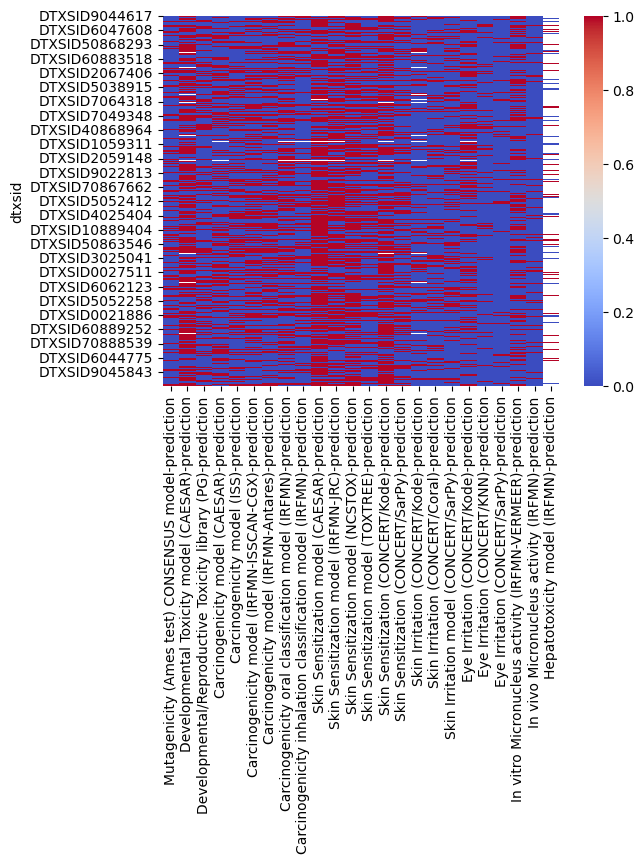

In [229]:
sns.heatmap(vega2.replace(mapping_dict), cmap = 'coolwarm')

In [235]:
vega3 = vega2.replace(mapping_dict)

In [249]:
vega3.to_csv(interim_dir+'vega_binary_130624.csv')

In [232]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', sheet_name = 'All data', index_col = [0])


In [233]:
df['group_str'].nunique()

180

In [234]:
mydict = {k:v for k,v in zip(df['dtxsid'],df[ 'group_str'])}
selections = {k:v for k,v in zip(df['dtxsid'],df[ 'final_picks']) }

In [236]:
alerts_lst = []
for col in vega3.columns.tolist():
    alerts_lst.append([col, vega3[col].sum()])

In [240]:
pd.DataFrame(alerts_lst, columns = ['endpoint', 'number of substances with positive prediction']).sort_values(by =  'number of substances with positive prediction', ascending = False)

,endpoint,number of substances with positive prediction
9,Skin Sensitization model (CAESAR)-prediction,8991.0
13,Skin Sensitization (CONCERT/Kode)-prediction,7922.0
1,Developmental Toxicity model (CAESAR)-prediction,7697.0
11,Skin Sensitization model (NCSTOX)-prediction,7467.0
10,Skin Sensitization model (IRFMN-JRC)-prediction,7147.0
7,Carcinogenicity oral classification model (IRF...,5811.0
5,Carcinogenicity model (IRFMN-ISSCAN-CGX)-predi...,5277.0
18,Eye Irritation (CONCERT/Kode)-prediction,5027.0
3,Carcinogenicity model (CAESAR)-prediction,4966.0
6,Carcinogenicity model (IRFMN-Antares)-prediction,4759.0


In [242]:
pd.crosstab(vega3['Developmental Toxicity model (CAESAR)-prediction'], vega3['Developmental/Reproductive Toxicity library (PG)-prediction'])

Developmental/Reproductive Toxicity library (PG)-prediction,0.0,1.0
Developmental Toxicity model (CAESAR)-prediction,,
0.0,3475,1257
1.0,5131,2566


In [244]:
[e for e in vega3.columns if 'Eye' in e]

['Eye Irritation (CONCERT/Kode)-prediction',
 'Eye Irritation (CONCERT/KNN)-prediction',
 'Eye Irritation (CONCERT/SarPy)-prediction']

In [248]:
pd.crosstab(vega3['Eye Irritation (CONCERT/Kode)-prediction'], vega3['Eye Irritation (CONCERT/KNN)-prediction'], vega3['Eye Irritation (CONCERT/SarPy)-prediction'], aggfunc = np.max)

Eye Irritation (CONCERT/KNN)-prediction,0.0,1.0
Eye Irritation (CONCERT/Kode)-prediction,,
0.0,1.0,1.0
1.0,1.0,1.0
